# Введение в обработку изображений в Python при помощи Pillow

_[Оригинал статьи](https://kalebujordan.com/a-brief-introduction-to-python-pillow/), автор: Kalebu Jordan_

[Pillow](https://pillow.readthedocs.io/en/stable/) - это свободно распространяемая библиотека для работы с изображениями (_далее Imaging Library_) на __Python__ с открытым исходным кодом, которая добавляет вашему коду поддержку открытия, изменения и сохранения изображений в различных расширениях.

### Давайте начнем

Самый важный класс в Imaging Library Python - это класс Image, определенный в одноименном модуле. Мы используем open(), чтобы открыть изображение в нашей локальной директории, как показано ниже:

In [2]:
from PIL import Image
sample = Image.open('pena.jpg')

Это просто! Теперь вы умеете считывать изображения с помощью __Pillow__, а значит можно приступать к обработке изображения с его помощью. Вы также можете проверить тип изображения, которое мы только что загрузили.

In [3]:
type(sample)

PIL.JpegImagePlugin.JpegImageFile

Вы можете посмотреть свойства изображения, например: 
- формат
- размер
- цветовой режим

In [5]:
sample.format

'JPEG'

In [6]:
sample.size

(640, 640)

In [7]:
sample.mode

'RGB'

Кроме того, вы можете вывести на экран изображение, используя метод _show_

In [15]:
sample.show() #Открывает в новом окне, расширение изображения меняется на PNG
#http://joxi.ru/n2Y1M5Wfe6YJ82

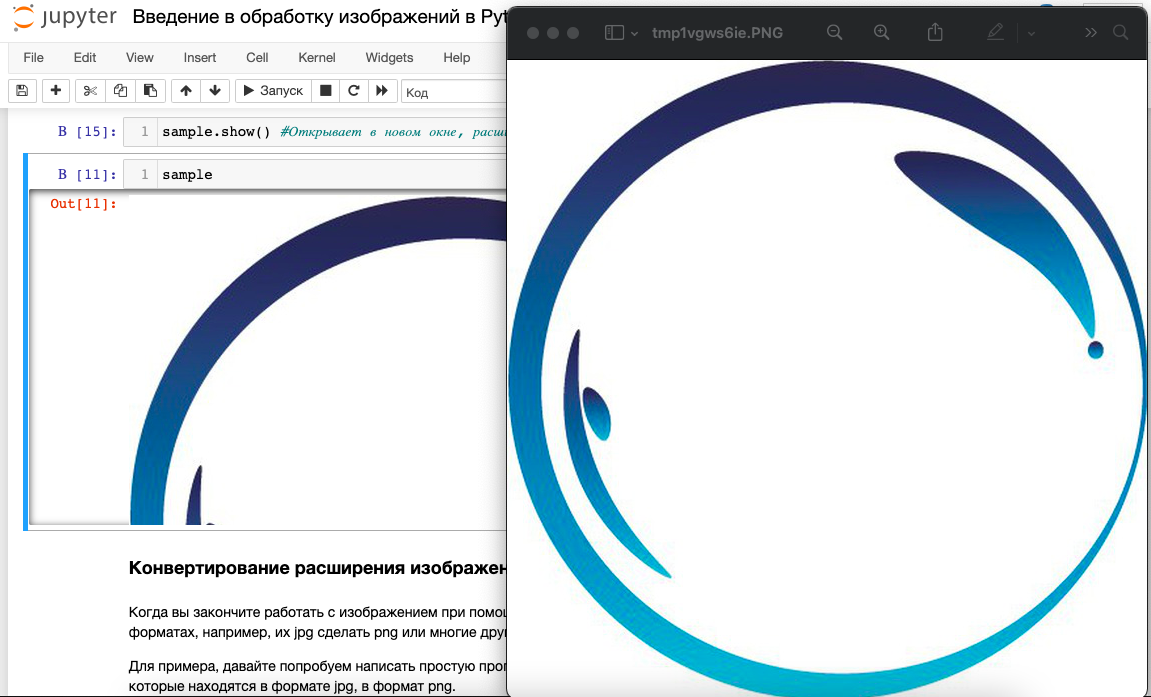

### Конвертирование расширения изображения

Когда вы закончите работать с изображением при помощи библиотеки __Pillow__  в изначальном расширении, вы можете  пересохранить его в других форматах, например, их jpg сделать png или многие другие.

Для примера, давайте попробуем написать простую программу на Python для преобразования всех изображений в каталоге вашего проекта, которые находятся в формате jpg, в формат png.

In [13]:
import os
import sys
from PIL import Image
jpg_images = [image for image in os.listdir() if image.endswith('.jpg')]
for jpg_image in jpg_images:
    try:
        new_name = jpg_image.split('.')[0] + '.png'
        Image.open(jpg_image).save(new_name)
    except IOError as error:
        print('Couldn\'t read {} '.format(jpg_image))
        
#http://joxi.ru/12Mdnj8Ckb3R7m

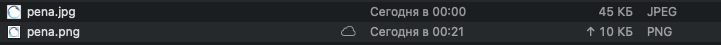

После того, как вы запустите приведенный выше код, в каталоге проекта, состоящем из изображений в формате jpg, откроются все изображения и преобразуются в .png, как показано на скриншоте. Вы можете повторить тот же процесс для преобразования изображений в другие преобразований.

### Обрезка изображения

__Pillow__ также может использоваться для обрезки изображения, при этом вы можете получить производный прямоугольник выбранного изображения, указав координаты, по которым преобразовать изображение.

In [18]:
from PIL import Image
picture = Image.open('pena.png')
cord = (10, 10, 640, 340) # лево, верх, право, низ
new_picture = picture.crop(cord)
new_picture.show()
#http://joxi.ru/52aM9YOfk367V2

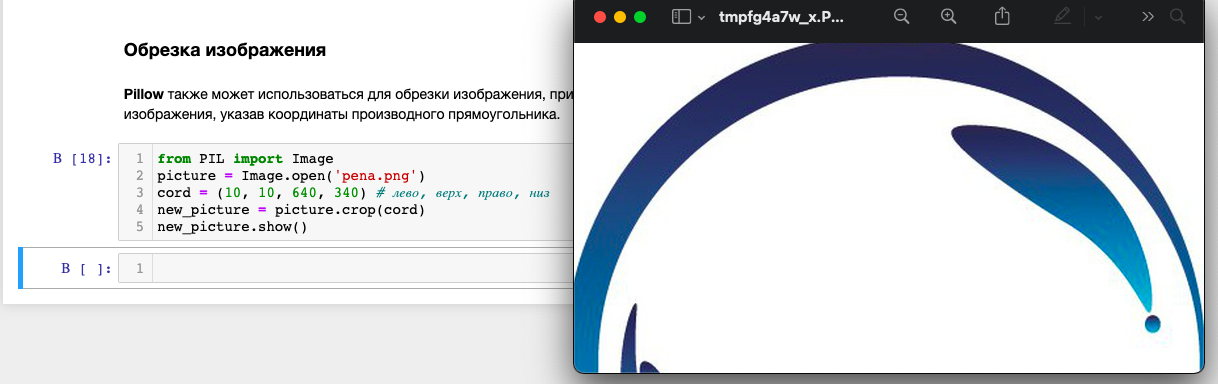

Как мы видим, изображение было успешно обрезано. Координаты обрезанной поверхности представлены диагональными координатами.

При этом первые две точки находятся (x, y) от верхней левой диагональной точки, а следующие две точки (x2, y2) также являются диагональной точкой снизу справа.

### Геометрическое преобразование

С помощью __Pillow__ мы можем выполнять некоторые геометрические преобразования над изображением, включая изменение размера и поворот изображения.

Эти знания играют большую роль при генерации данных для глубокого обучения путем преобразования одного изображения в тонны других изображений с разных ракурсов.

### Изменение размера изображения

In [20]:
from PIL import Image
image = Image.open('pena.png')
resized_image = image.resize((320, 320))
resized_image.save('resized.png')

Когда вы запустите приведенный выше код, вы должны увидеть новое изображение с измененным размером в вашем каталоге с размером __320 на 320__.

### Поворот изображения

In [22]:
from PIL import Image
image = Image.open('pena.png')
rotated_img = image.rotate(80)
rotated_img.save('./rotation/rotated_img.png')
#http://joxi.ru/1A5n0pgibyoj7r

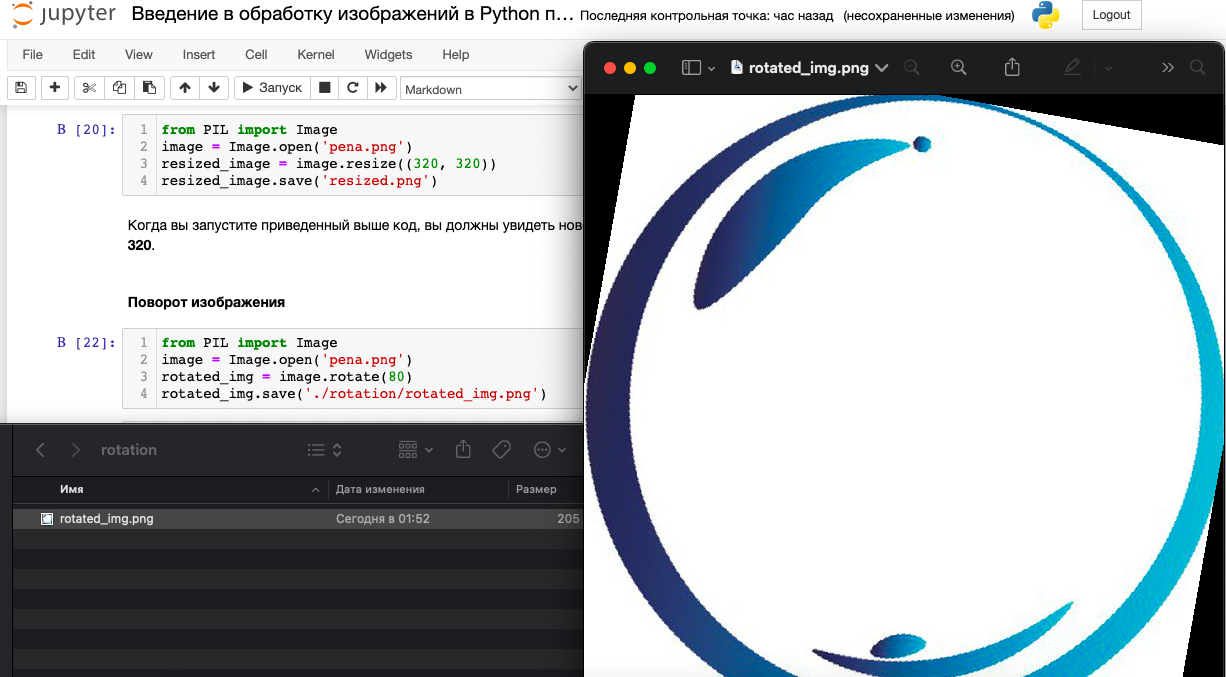
Используйте функцию вращения для создания 360 изображений одного из того же изображения под разными углами - это поможет сгенерировать данные, которые вы потенциально можете использовать для обучения своей модели глубокого обучения.

### Генератор изображений

In [23]:
from PIL import Image 
images = ['pena.jpg']
for img in images:
    try:
        org_img = Image.open(img)
        for angle in range(1, 361):
            image_name = str(angle)+'.jpg'
            new_img = org_img.rotate(angle)
            new_img.save('./rotation/'+image_name)
    except IOError:
        print('Couldn\'t read {}'.format(img))
#http://joxi.ru/82Qa15gt9vPO62

После запуска скрипта, вы должны увидеть 360 изображений одного и того же исходного изображения с разным поворотом, как показано ниже.

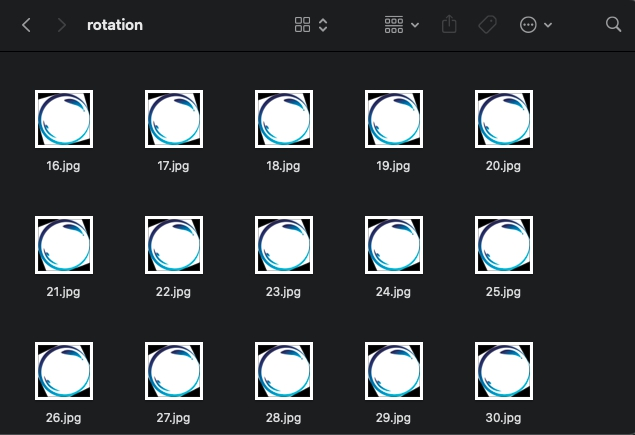

### Фильтрация изображений

__Фильтрация__ - это метод изменения или улучшения изображения. Например, вы можете отфильтровать изображение, чтобы выделить определенные особенности или удалить другие.

Фильтрация изображений используется для получения различных результатов, как, например,- сглаживание, повышение резкости, удаление шума и обнаружение краев.

В библиотеке __Pillow__ доступно множество фильтров, включая BLUR, BoxBlur, CONTOUR, FIND_EDGES, Filter, GaussianBlur, Kernel, MaxFilter, MedianFilter, SHARPEN, SMOOTH и т.д.

### Пример использования

Давайте попробуем найти края на изображении ниже, используя фильтр FIND_EDGES.

In [27]:
from PIL import Image
from PIL import Image, ImageFilter
image = Image.open('pena.jpg')
edges = image.filter(ImageFilter.FIND_EDGES)
edges.show()
# http://joxi.ru/bmoweVGTyqxPkm

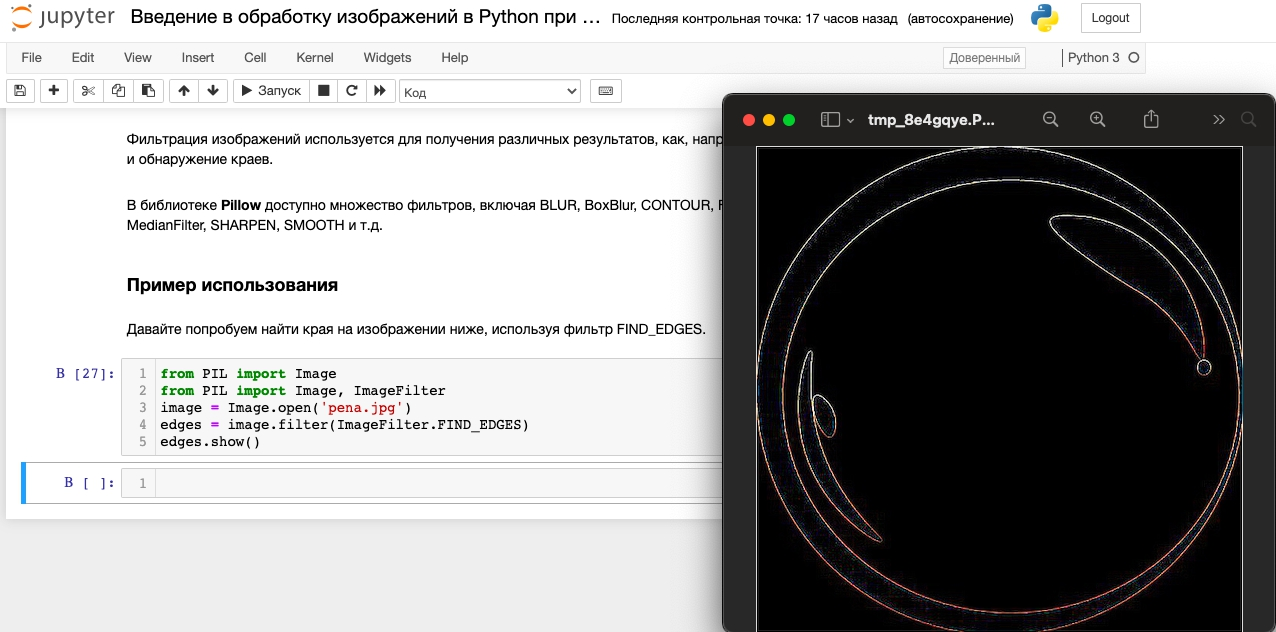
Таким же образом вы можете экспериментировать с другими фильтрами в Python библиотеке __Pillow__ в зависимости от того, что вы пытаетесь сделать.

### Чтение изображения из открытого файла

Кроме того, вы можете использовать __Pillow__ для чтения изображения из файлового объекта Python, как показано ниже

In [30]:
from PIL import Image
image = Image.open(open('pena.jpg', 'rb'))

### Чтение изображения из URL

В этом случае вам придется использовать __Pillow__ в сочетании с запросами. Запросы должны будут отправлять GET-request на сервер, чтобы получить необработанные байты изображения, а уже __Pillow__ считает эти байты.

In [32]:
import requests
from PIL import Image
url = 'http://pena.marketing/images/Logo1.png'
raw = requests.get(url, stream=True).raw
Image.open(raw).show()
#http://joxi.ru/bmoweVGTyqxZpm

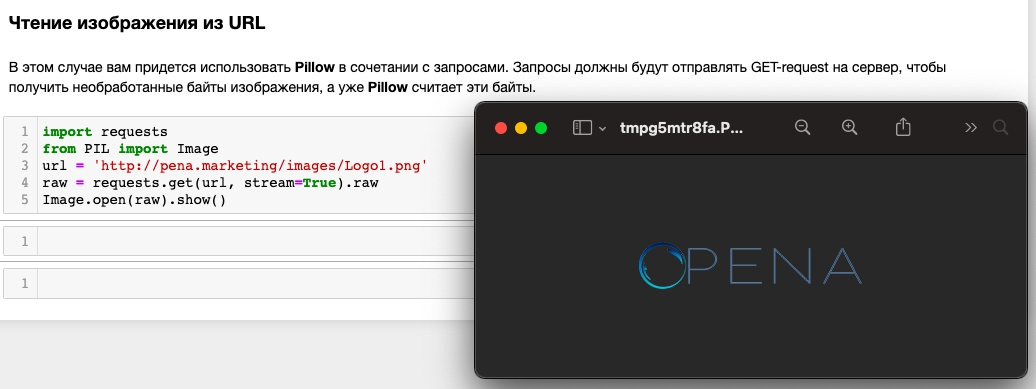

### Создание новых изображений

С помощью __Pillow__ вы также можете создать новое пустое изображение, которое может понадобиться для различных целей. Используйте __Image.new()__ для создания совершенно нового изображения.

__Синтаксис__:
```python
new = Image.new(mode, shape, color)
```

__Пример использования__:

In [34]:
from PIL import Image
new_img = Image.new('RGB', (500, 500), 'blue')
new_img.show()
#http://joxi.ru/4AkYDeJTknyPXm

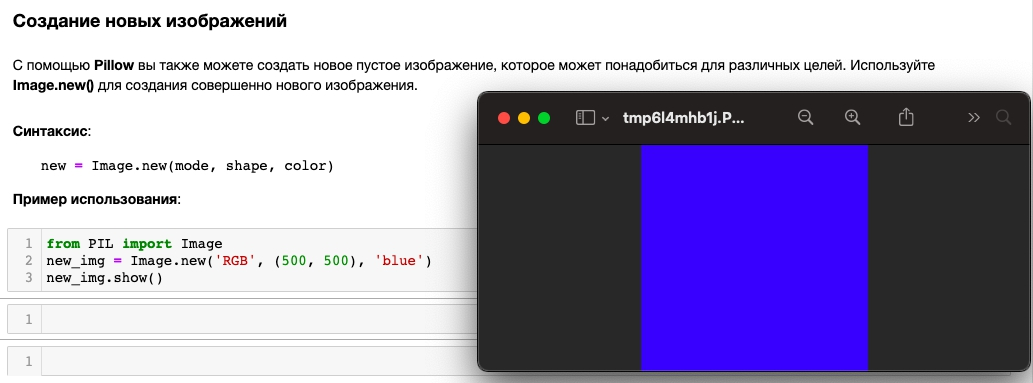

### Рисование прямоугольников на изображениях

__Pillow__ также может использоваться для рисования прямоугольника на изображениях. Обычно это делают при обнаружении объекта. При этом вы можете нарисовать не просто прямоугольник, а рамку над обнаруженным объектом.

### Пример исползования

Давайте попробуем нарисовать прямоугольную рамку внутри пустого изображения.

In [36]:
from PIL import Image, ImageDraw
new_img = Image.new('RGB', (400, 400), 'black')
pencil = ImageDraw.Draw(new_img)
pencil.rectangle((200, 50, 300, 300), fill ='green')
new_img.show()
# http://joxi.ru/DrleDVquyjVb5m

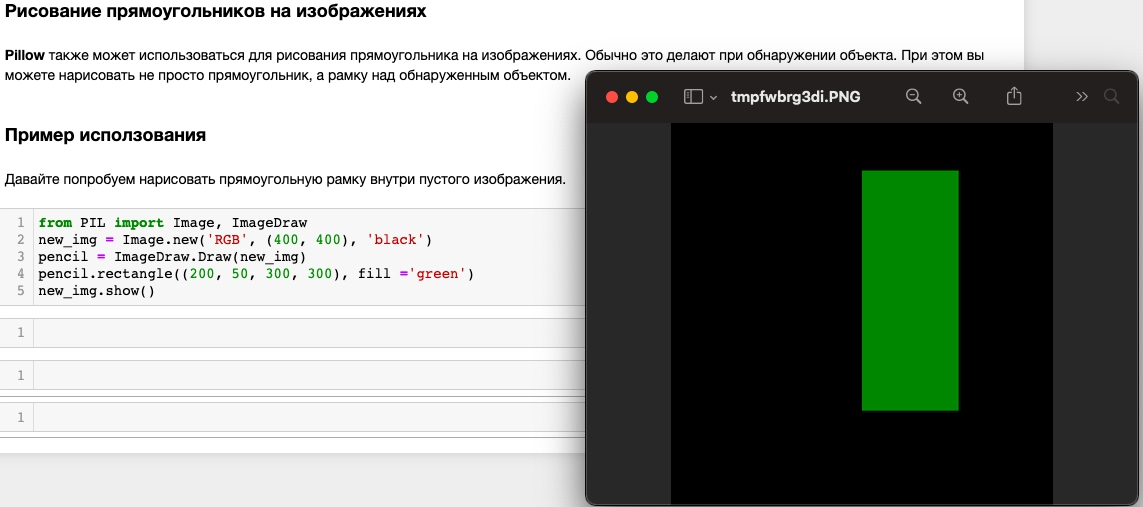
Первые две координаты представляют (x, y) левой верхней части, а следующие две (x2, y2) представляют координатную точку правой нижней части.

### Рисование текста на изображениях

Мы также можем использовать библиотеку __Pillow__ для рисования текста на изображениях.

In [58]:
from PIL import Image , ImageDraw, ImageFont 
new_img = Image.new('RGB', (200, 200), 'black')
font = ImageFont.load_default()
pencil = ImageDraw.Draw(new_img)
pencil.text((100,100),'Hello World',  font=font, fill='blue', size = 36)
new_img.show()
# http://joxi.ru/brRRy6MtOE7NMr

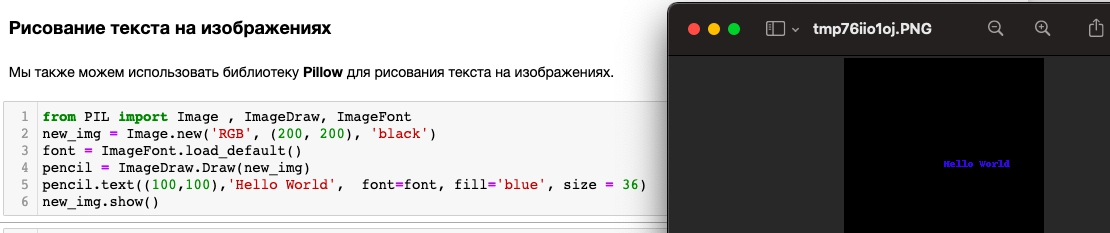